# 0. Présentation  

## Intitulé du projet

### **Introduction**


### **Bonne lecture**
___ 
- Lien 
    - Données : "https://www.kaggle.com/datasets/laotse/credit-risk-dataset"
    - Profil Github : "https://github.com/ange2219"
    - Profil Kaggle : "https://www.kaggle.com/angedahou"
  

# 1. Importation des packages

import os

print(os.listdir("/kaggle/input"))
print(os.listdir("/kaggle/input/credit-risk-dataset"))

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# 2. Chargement des données 

In [2]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
data['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

## 2.1. Description de la base de données "  "

La base de données " " contient des données sur 

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :


| Variable                   | Signification           |
|----------------------------|-------------------------|
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |
|                            |                         |





La variable cible est :
- 


La base de données contient  entrées (lignes) et  caractéristiques (colonnes).

## 2.2. Qualité des données

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# 3. Analyse Exploratoire de données (EDA)

In [9]:
df = data.copy()

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [11]:
df['date'] = df['day'].astype(str) + "/" + df['month'] + '/2025'

In [12]:
df['date'] = pd.to_datetime(df['date'], format ="%d/%b/%Y")

In [13]:
def nv(row):
    if row['deposit'] == 'yes':
        return 'engage'
    elif row['duration']> 300 or row['campaign']>3:
        return 'potentiel'
    else:
        return 'non interesse'

df["class"] = df.apply(nv, axis = 1)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,date,class
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,2025-05-05,engage
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,2025-05-05,engage
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2025-05-05,engage
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,2025-05-05,engage
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,2025-05-05,engage


In [15]:
var_cat = df.select_dtypes('object').columns
var_num = df.select_dtypes('number').columns

In [16]:
print(var_cat)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit', 'class'],
      dtype='object')


## 3.1. Analyse univariée

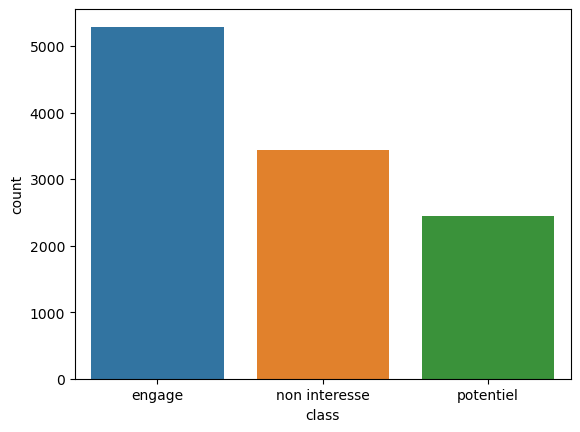

In [17]:
plt.figure()
sns.countplot(x = df['class'], hue = df['class'])
plt.show()

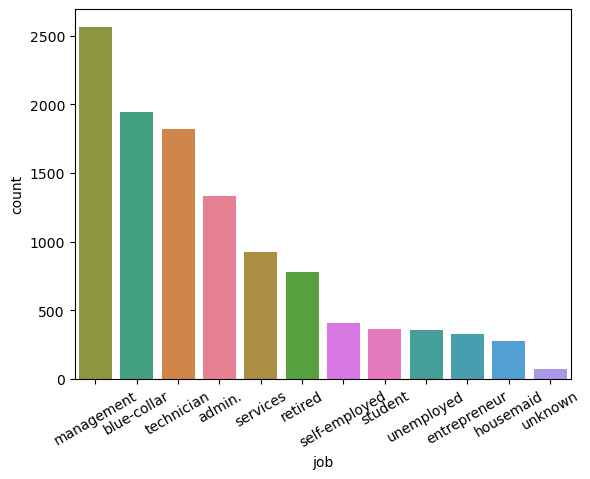

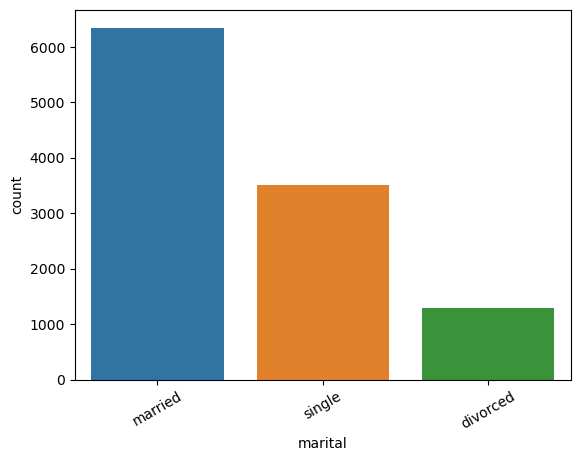

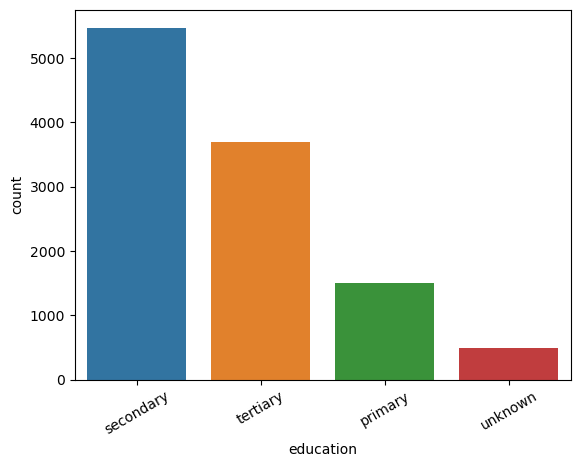

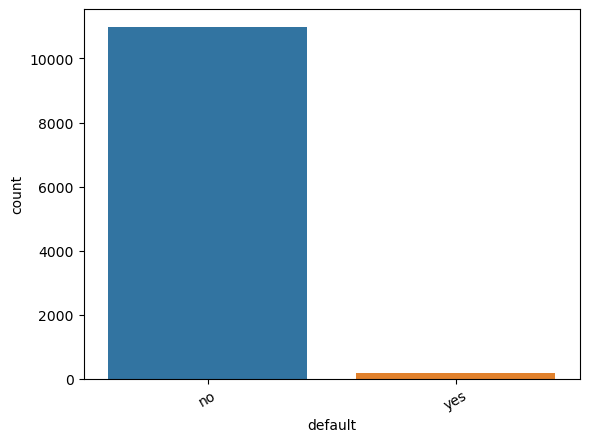

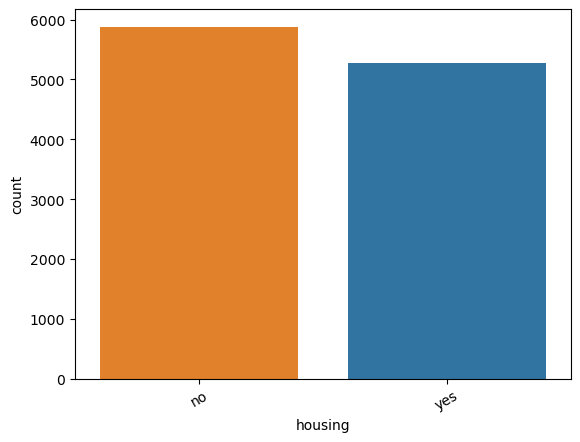

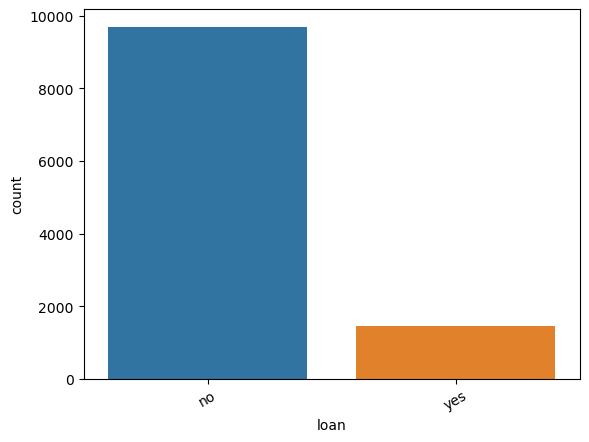

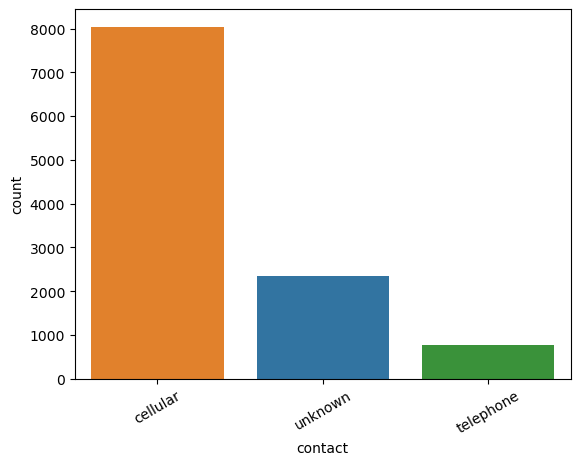

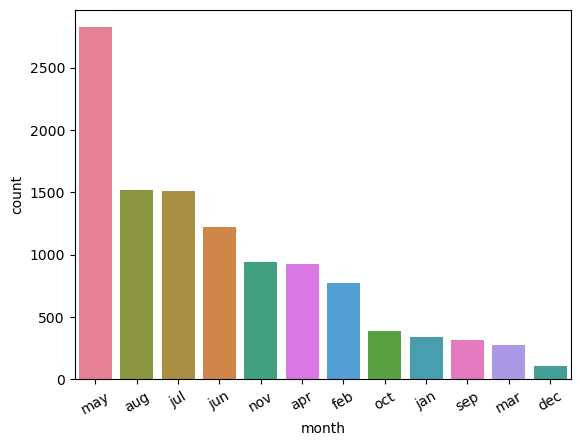

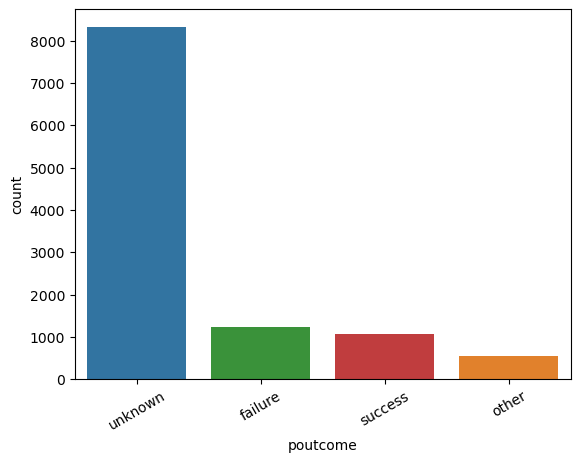

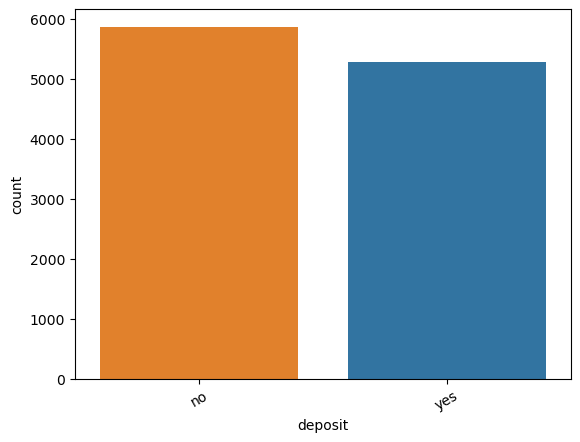

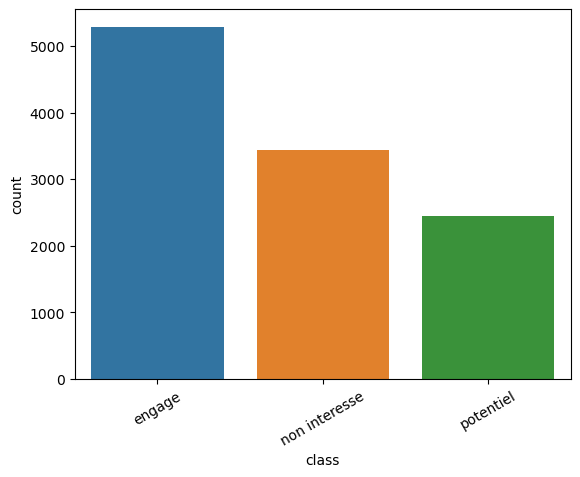

In [18]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.countplot(x = df[col], hue = df[col], order = df[col].value_counts().index)
    plt.xticks(rotation = 30)
    plt.show()

## 3.2. Analyse bivariée

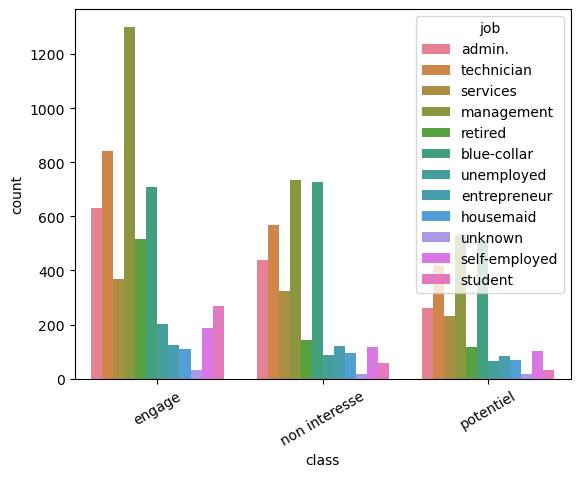

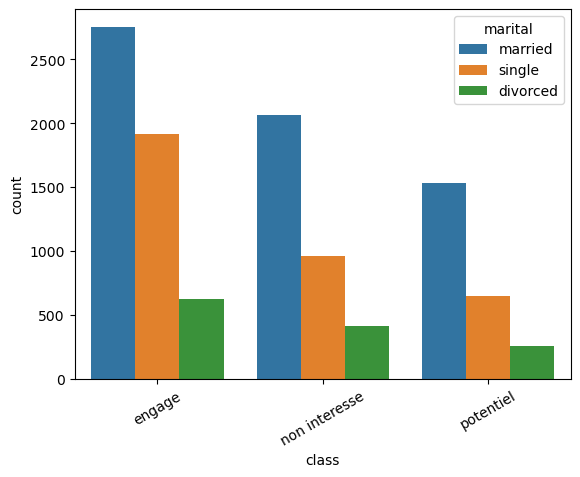

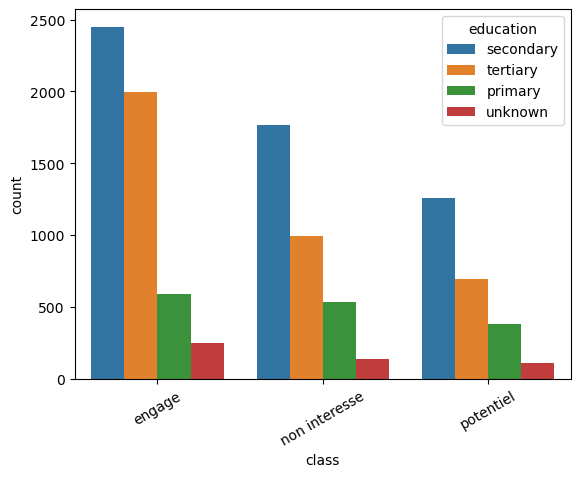

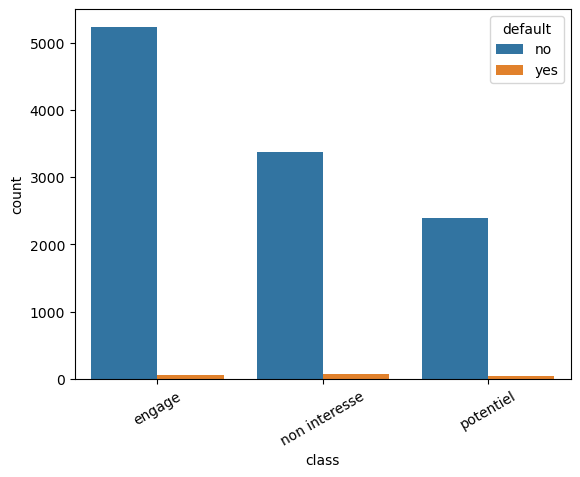

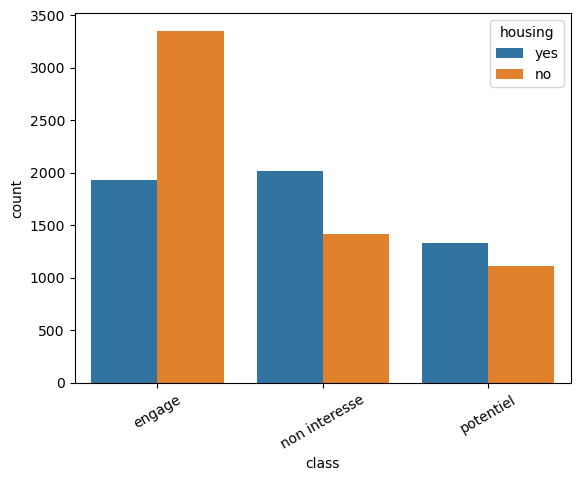

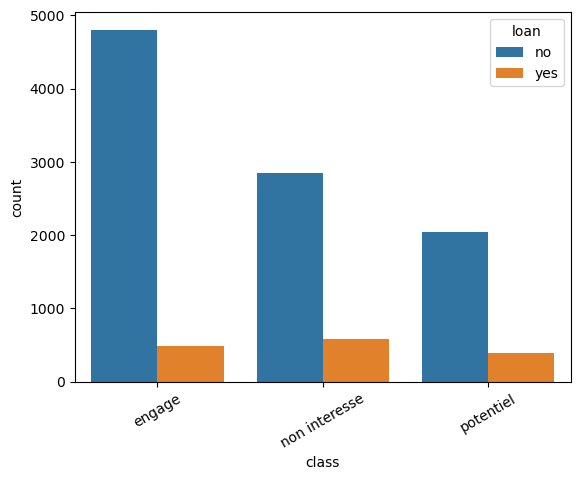

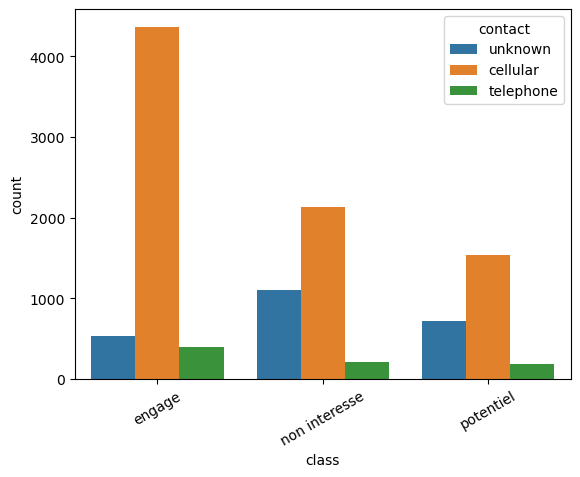

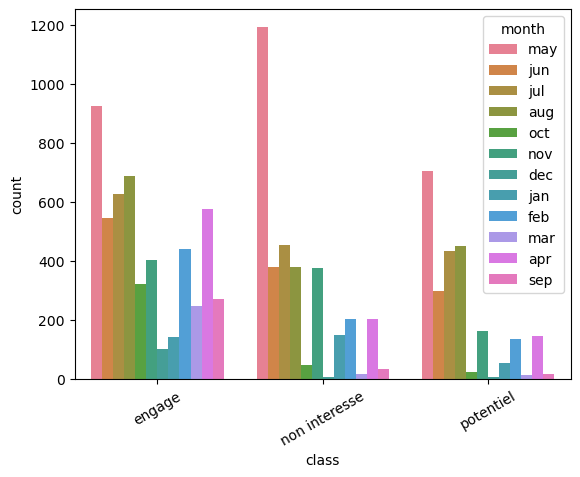

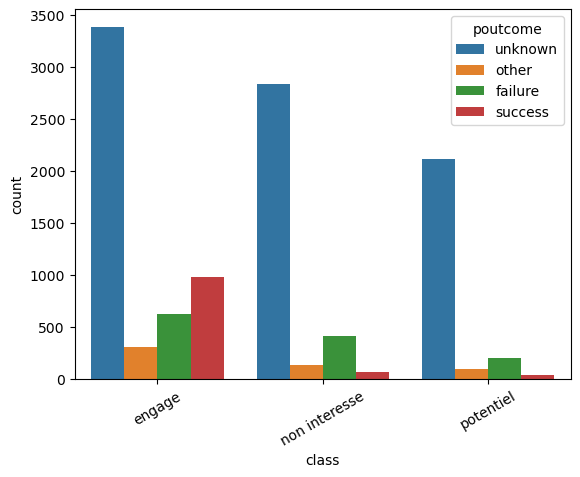

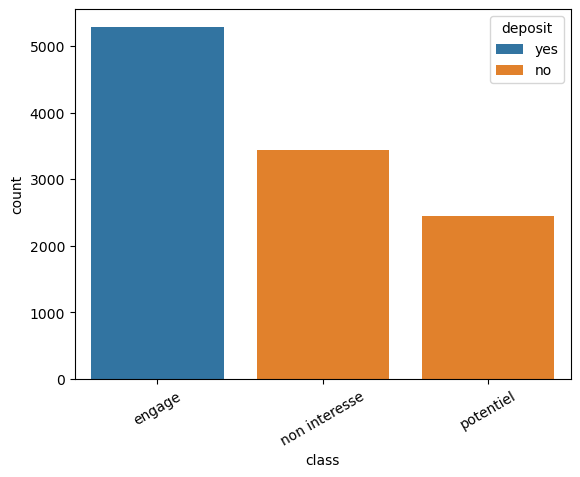

In [19]:
for col in df.select_dtypes('object').drop('class', axis = 1):
    plt.figure()
    sns.countplot(x = df['class'], hue = df[col])
    plt.xticks(rotation = 30)
    plt.show()

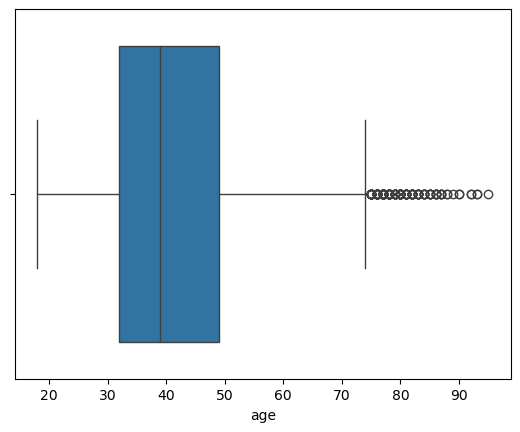

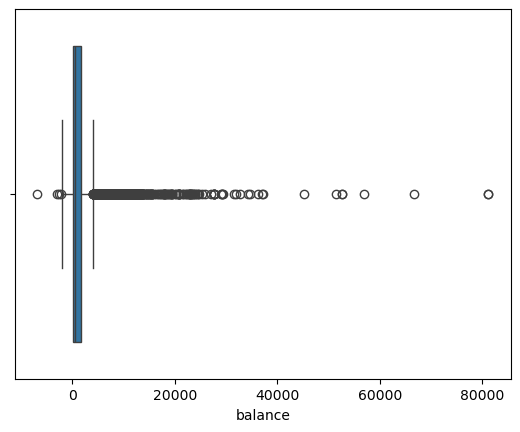

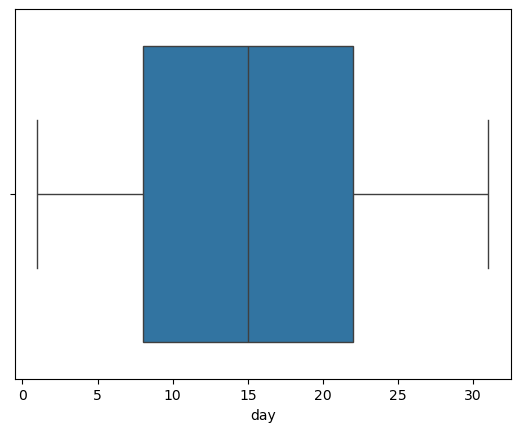

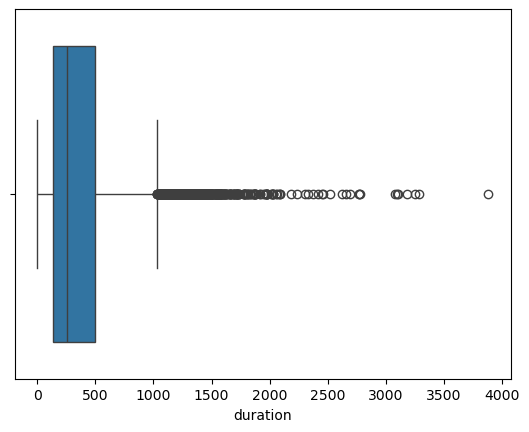

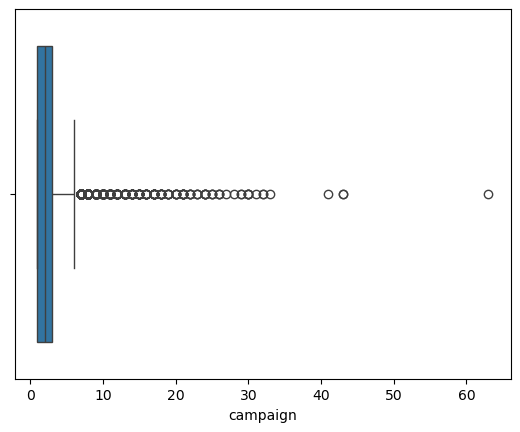

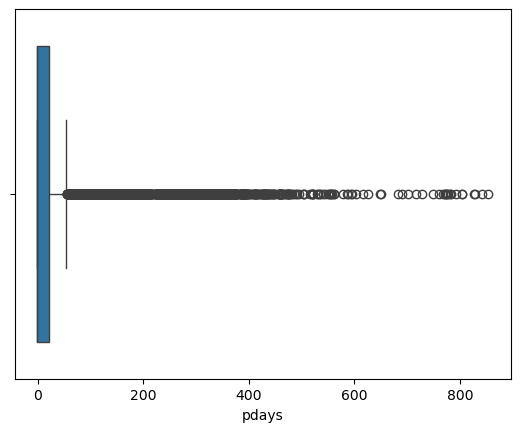

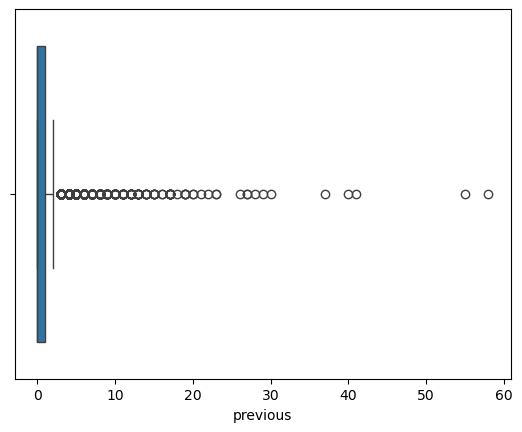

In [20]:
for col in df.select_dtypes('number'):
    plt.figure()
    sns.boxplot(x = df[col], data = df)
    plt.show()

# 4. Preprocessing

In [21]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [22]:
df['job'] = df['job'].replace({'admin.': 0,
                               'technician': 1,
                               'services': 2,
                               'management': 3,
                               'retired': 4,
                               'blue-collar': 5,
                               'unemployed': 6,
                               'entrepreneur': 7,
                               'housemaid': 8,
                               'unknown': 9,
                               'student': 10,
                               'self-employed': 11})
df['marital'] = df['marital'].replace({'married': 0,
                                       'single': 1,
                                       'divorced': 2})
df['contact'] = df['contact'].replace({'unknown': 0,
                                       'cellular': 1,
                                       'telephone': 2})
df['education'] = df['education'].replace({'secondary': 0,
                               'tertiary': 1,
                               'primary': 2,
                               'unknown': 3})
df['poutcome'] = df['poutcome'].replace({'unknown': 0,
                               'other': 1,
                               'failure': 2,
                               'success': 3})
df['default'] = df['default'].replace({'no': 0,
                                       'yes': 1})
df['housing'] = df['housing'].replace({'no': 0,
                                       'yes': 1})
df['loan'] = df['loan'].replace({'no': 0,
                                'yes': 1})

df['class'] = df['class'].replace({'engage': 0,
                                   'non interesse': 1,
                                   'potentiel': 2})

In [23]:
df.dtypes

age                   int64
job                   int64
marital               int64
education             int64
default               int64
balance               int64
housing               int64
loan                  int64
contact               int64
day                   int64
month                object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome              int64
deposit              object
date         datetime64[ns]
class                 int64
dtype: object

In [24]:
df.duplicated().sum()

0

In [25]:
df.drop(['deposit', 'month', 'date', 'day', 'default', 'poutcome'], axis = 1, inplace = True)

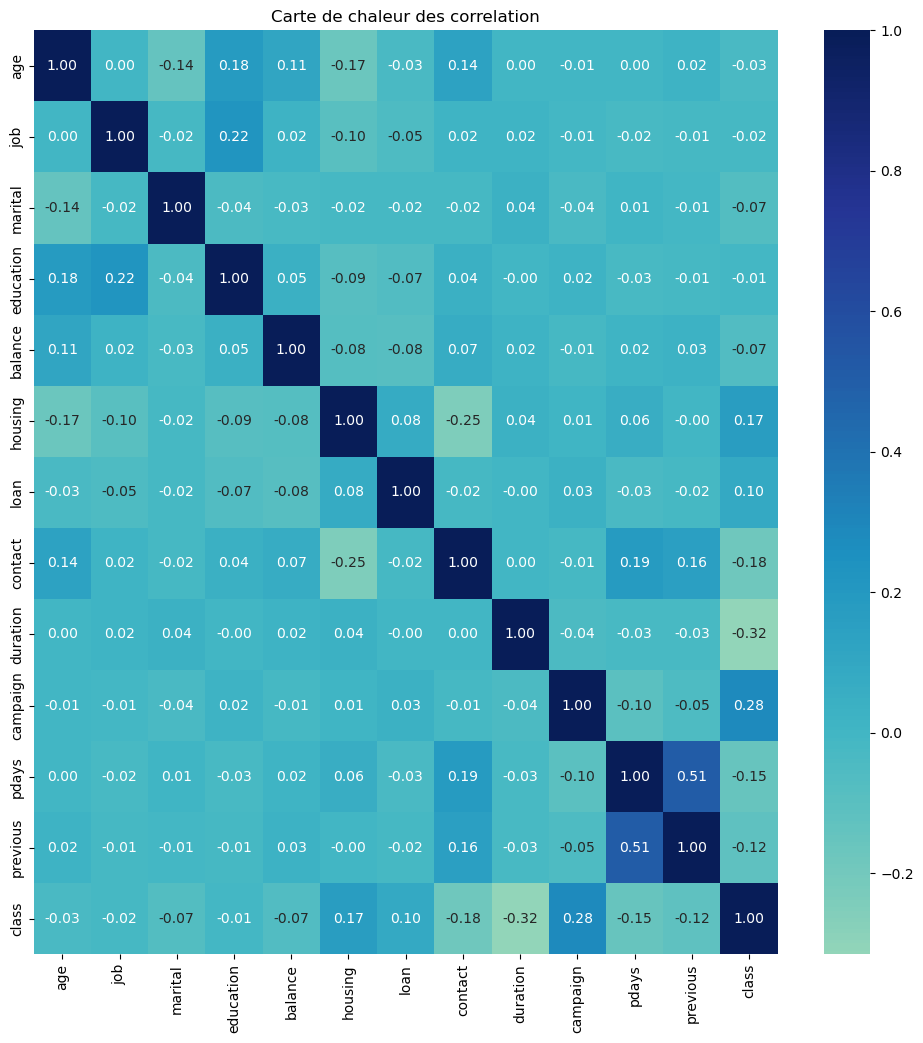

In [26]:
corr_matrix = df.corr()

# Carte de chaleur pour visualiser les correlations
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0)
plt.title('Carte de chaleur des correlation')
plt.show()

# 5. Modelisation 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
seed = 42

In [28]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed, stratify = y)

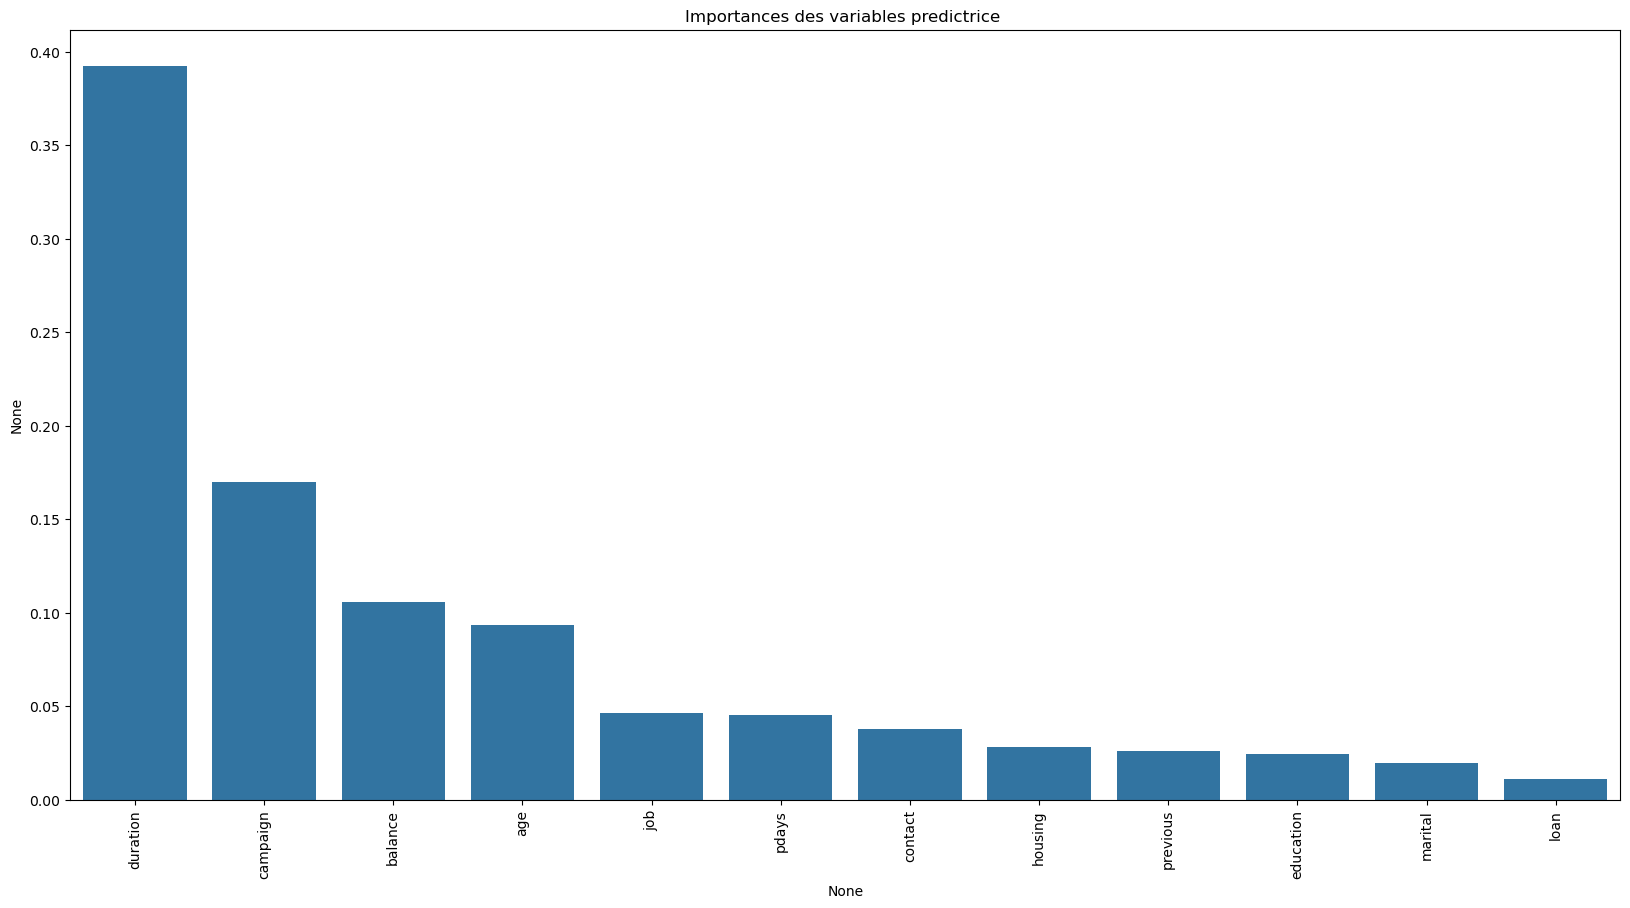

In [30]:
rfr = RandomForestClassifier(random_state = seed)
rfr.fit(X_train, y_train)
var_imp = pd.Series(rfr.feature_importances_, X.columns).sort_values(ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(x = var_imp.index, y = var_imp)
plt.xticks(rotation = 90)
plt.xlabel = ('Variables')
plt.ylabel = ('Score')
plt.title('Importances des variables predictrice ')
plt.show()

In [31]:
var_imp 

duration     0.392132
campaign     0.169801
balance      0.105564
age          0.093492
job          0.046521
pdays        0.045168
contact      0.037623
housing      0.028453
previous     0.025806
education    0.024681
marital      0.019434
loan         0.011326
dtype: float64

In [32]:
seuil = 0.011 #var_imp.mean()  # Seuil de 1% d'importance
features_importantes = var_imp[var_imp > seuil].index.to_list()
X_train = X_train[features_importantes]
X_test = X_test[features_importantes]

In [33]:
print(len(features_importantes))
print(features_importantes)

12
['duration', 'campaign', 'balance', 'age', 'job', 'pdays', 'contact', 'housing', 'previous', 'education', 'marital', 'loan']


In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

df_undersampled = pd.concat([X_train_undersampled, y_train_undersampled], axis=1)

print(df_undersampled['class'].value_counts())

class
0    1950
1    1950
2    1950
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

df_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

print(df_smote['class'].value_counts())

class
1    4231
0    4231
2    4231
Name: count, dtype: int64


In [36]:
def evaluation(model, X_train, y_train):
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 5, 
                                                      scoring = 'f1_macro', train_sizes = np.linspace(0.1, 1,5), n_jobs=-1)
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    plt.show()

In [37]:
XGBClassifier = XGBClassifier(n_estimators = 10, random_state = seed)
AdaBoostClassifier = AdaBoostClassifier(n_estimators = 20, random_state = seed)
RandomForestClassifier = RandomForestClassifier(n_estimators = 20, random_state = seed)
DecisionTreeClassifier = DecisionTreeClassifier(random_state = seed)
LogisticRegression = LogisticRegression(random_state = seed)
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC(random_state = seed)

In [38]:
ovr_1 = OneVsRestClassifier(LogisticRegression)
ovr_2 = OneVsRestClassifier(KNeighborsClassifier)
ovr_3 = OneVsRestClassifier(SVC)


In [39]:
dicts_of_models = {'XGB':XGBClassifier, 
                   #'AdaBoostClassifier':AdaBoostClassifier, 
                   #'RandomForestClassifier':RandomForestClassifier, 
                   #'DecisionTreeClassifier':DecisionTreeClassifier, 
                   #'LogisticRegression':ovr_5,
                   #'KNeighborsClassifier':ovr_6, 
                   #'SVC':ovr_7
                   }

XGB
[[913 107  38]
 [ 79 608   0]
 [180   3 305]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1058
           1       0.85      0.89      0.87       687
           2       0.89      0.62      0.73       488

    accuracy                           0.82      2233
   macro avg       0.84      0.79      0.81      2233
weighted avg       0.82      0.82      0.81      2233



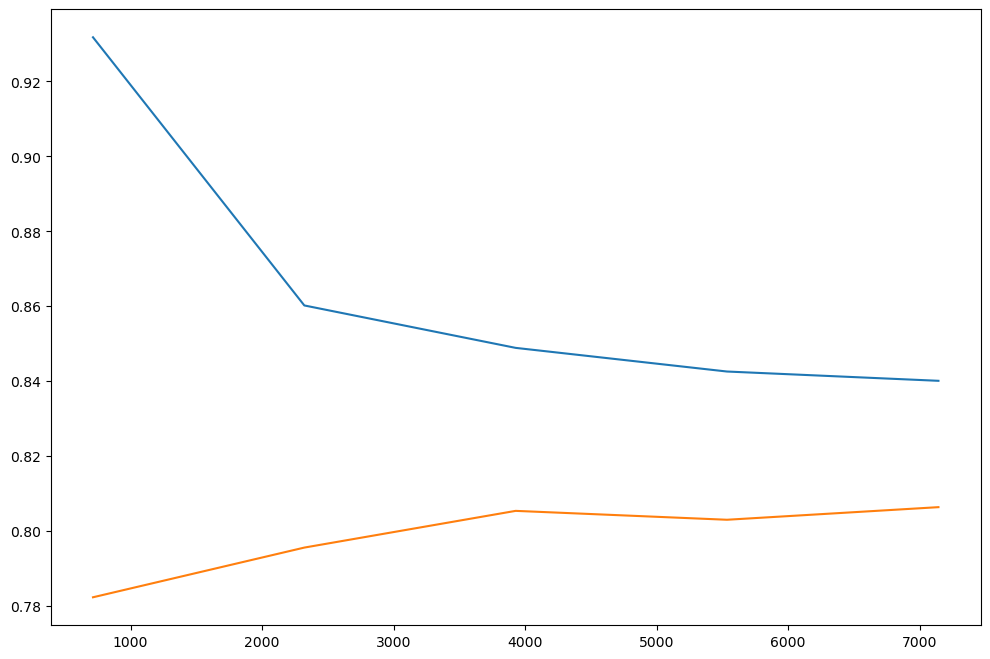

In [40]:
for name, model in dicts_of_models.items():
    print(name)
    evaluation(model, X_train, y_train)

In [41]:
from xgboost import XGBClassifier
final_model = XGBClassifier(n_estimators = 20, random_state = seed)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [42]:
import joblib

joblib.dump(value = final_model, filename = 'bank.plk')

['bank.plk']

In [43]:
model_loaded = joblib.load(filename = 'bank.plk')

In [47]:
X.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [51]:

def utilistion_du_model():
    age = float(input())
    job = float(input())
    balance = float(input())
    housing = float(input())
    loan = float(input())
    marital = 2
    education = 1
    contact = 1
    duration = 8000
    campaign = 2
    pdays = -1
    previous = 0
    prediction = model_loaded.predict(pd.DataFrame({'duration':[duration] , 'campaign':[campaign], 'balance':[balance] ,'age':[age] , 'job':[job] , 'pdays':[pdays] ,  'contact':[contact] ,'housing':[housing] , 'previous':[previous], 'education':[education] , 'marital':[marital], 'loan':[loan]}))
    
    if prediction == 0:
        print("Notre model predit  que votre client sera engagé")
    elif prediction == 1:
        print("Notre model predit  que votre client ne seras pas interresser ")
    else:
        print("Notre model predit  que votre client pourrais etre un potentiel angager")

In [52]:
utilistion_du_model()

 15
 10
 1500
 0
 0


Notre model predit  que votre client sera engagé


# 6. Optimisation

# 7. Conclusion

## **Évaluation du modèle de**


## **Pourquoi ce modèle est adapté au problème**


## **Impact métier**


